In [1]:
## https://qiskit.org/documentation/optimization/tutorials/12_qaoa_runtime.html

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

from qiskit.opflow import PauliSumOp, Z, I
from qiskit.algorithms.optimizers import SPSA


In [2]:
from qiskit import IBMQ

#IBMQ.save_account('2dc5bcf5b70f30755dda6e06e68f45a4b21bfe1c70cf2b073f2449287d91193049d8cc339be1c68b22b9b3e8955477d3a417e409bfb4976ce16f43fb2665c4e1')

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

In [3]:
provider_2 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [4]:
program_id = "qaoa"
qaoa_program = provider.runtime.program(program_id)
qaoa_program2 = provider_2.runtime.program(program_id)

In [5]:
print(f"Program name: {qaoa_program.name}, Program id: {qaoa_program.program_id}")
print(qaoa_program.parameters())

Program name: qaoa, Program id: qaoa
ParameterNamespace (Values):
| Name       | Value        | Type         | Required |     Description |
-------------------------------------------------------------------------
| use_initia | None         | boolean     | False    | A boolean flag that, if set to True (the default is False), runs a heuristic algorithm to permute the Paulis in the cost operator to better fit the coupling map and the swap strategy. This is only needed when the optimization problem is sparse and when using swap strategies to transpile. |
| use_swap_s | None         | boolean     | False    | A boolean on whether or not to use swap strategies when transpiling. This flag is set to True by default. If this is False then the standard transpiler with the given optimization level will run. |
| alpha      | None         | number      | False    | The fraction of top measurement samples to be used for the expectation value (CVaR expectation). Defaults to 1, i.e. using all sampl

In [6]:
print(f"Program name: {qaoa_program2.name}, Program id: {qaoa_program2.program_id}")
print(qaoa_program2.parameters())

Program name: qaoa, Program id: qaoa
ParameterNamespace (Values):
| Name       | Value        | Type         | Required |     Description |
-------------------------------------------------------------------------
| use_initia | None         | boolean     | False    | A boolean flag that, if set to True (the default is False), runs a heuristic algorithm to permute the Paulis in the cost operator to better fit the coupling map and the swap strategy. This is only needed when the optimization problem is sparse and when using swap strategies to transpile. |
| use_swap_s | None         | boolean     | False    | A boolean on whether or not to use swap strategies when transpiling. This flag is set to True by default. If this is False then the standard transpiler with the given optimization level will run. |
| alpha      | None         | number      | False    | The fraction of top measurement samples to be used for the expectation value (CVaR expectation). Defaults to 1, i.e. using all sampl

In [7]:
# Define the cost operator to run.
op = (
      0.5 * (Z ^ Z ^ I ^ I )
    + 0.5 * (I ^ Z ^ Z ^ Z )
    + 0.5 * (Z ^ I ^ I ^ Z )
    + 0.5 * (I ^ I ^ Z ^ Z )
)

# SPSA helps deal with noisy environments.
optimizer = SPSA(maxiter=100)

# We will run a depth two QAOA.
reps = 2

# The initial point for the optimization, chosen at random.
initial_point = np.random.random(2 * reps)

# The backend that will run the programm.
options = {"backend_name": "ibmq_qasm_simulator"}

# The inputs of the program as described above.
runtime_inputs = {
    "operator": op,
    "reps": reps,
    "optimizer": optimizer,
    "initial_point": initial_point,
    "shots": 2 ** 13,
    # Set to True when running on real backends to reduce circuit
    # depth by leveraging swap strategies. If False the
    # given optimization_level (default is 1) will be used.
    "use_swap_strategies": False,
    # Set to True when optimizing sparse problems.
    "use_initial_mapping": False,
    # Set to true when using echoed-cross-resonance hardware.
    "use_pulse_efficient": False,
}

In [8]:
job = provider.runtime.run(
    program_id=program_id,
    options=options,
    inputs=runtime_inputs,
)

In [9]:
print(f"Job id: {job.job_id()}")
print(f"Bob status: {job.status()}")

Job id: c9118h97rmgd1hqsjd1g
Bob status: JobStatus.QUEUED


In [18]:
result = job.result()
result

{'optimizer_time': 131.86879539489746,
 'optimal_value': -0.166748046875,
 'optimal_point': array([ 2.54437146, -1.34587597, -2.10185404,  0.04187945]),
 'optimal_parameters': None,
 'cost_function_evals': 200,
 'eigenstate': {'0000': 0.19232083789204954,
  '0001': 0.07733980419227864,
  '0010': 0.15934435979977452,
  '0011': 0.2685955224636107,
  '0100': 0.29064180058966055,
  '0101': 0.3771099495670991,
  '0110': 0.2819002898854487,
  '0111': 0.22152260748059102,
  '1000': 0.30156654790029347,
  '1001': 0.3391021002220423,
  '1010': 0.23876104359275196,
  '1011': 0.3125,
  '1100': 0.109375,
  '1101': 0.06629126073623882,
  '1110': 0.3561334787512963,
  '1111': 0.02209708691207961},
 'eigenvalue': (-0.166748046875+0j),
 'aux_operator_eigenvalues': None,
 'optimizer_history': {'nfevs': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   3

In [11]:
result["eigenstate"]

{'0000': 0.19232083789204954,
 '0001': 0.07733980419227864,
 '0010': 0.15934435979977452,
 '0011': 0.2685955224636107,
 '0100': 0.29064180058966055,
 '0101': 0.3771099495670991,
 '0110': 0.2819002898854487,
 '0111': 0.22152260748059102,
 '1000': 0.30156654790029347,
 '1001': 0.3391021002220423,
 '1010': 0.23876104359275196,
 '1011': 0.3125,
 '1100': 0.109375,
 '1101': 0.06629126073623882,
 '1110': 0.3561334787512963,
 '1111': 0.02209708691207961}

In [12]:


def op_adj_mat(op: PauliSumOp) -> np.array:
    """Extract the adjacency matrix from the op."""
    adj_mat = np.zeros((op.num_qubits, op.num_qubits))
    for pauli, coeff in op.primitive.to_list():
        idx = tuple([i for i, c in enumerate(pauli[::-1]) if c == "Z"])  # index of Z
        adj_mat[idx[0], idx[1]], adj_mat[idx[1], idx[0]] = np.real(coeff), np.real(coeff)

    return adj_mat


def get_cost(bit_str: str, adj_mat: np.array) -> float:
    """Return the cut value of the bit string."""
    n, x = len(bit_str), [int(bit) for bit in bit_str[::-1]]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost += adj_mat[i, j] * x[i] * (1 - x[j])

    return cost


def get_cut_distribution(result) -> dict:
    """Extract the cut distribution from the result.

    Returns:
        A dict of cut value: probability.
    """

    adj_mat = op_adj_mat(PauliSumOp.from_list(result["inputs"]["operator"]))

    state_results = []
    for bit_str, amp in result["eigenstate"].items():
        state_results.append((bit_str, get_cost(bit_str, adj_mat), amp ** 2 * 100))

    vals = defaultdict(int)

    for res in state_results:
        vals[res[1]] += res[2]

    return dict(vals)

Text(0, 0.5, 'Probability')

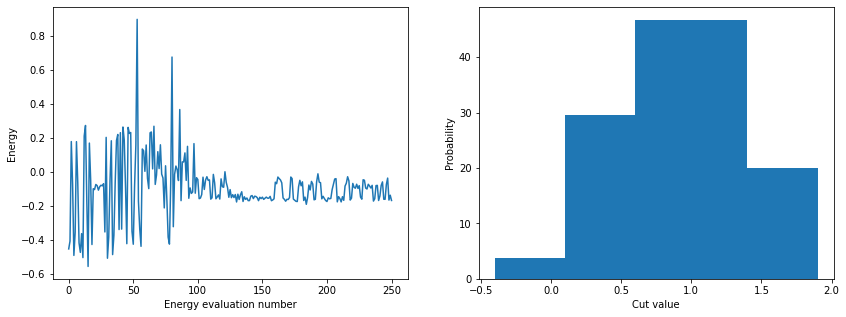

In [13]:
cut_vals = get_cut_distribution(result)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(result["optimizer_history"]["energy"])
axs[1].bar(list(cut_vals.keys()), list(cut_vals.values()))
axs[0].set_xlabel("Energy evaluation number")
axs[0].set_ylabel("Energy")
axs[1].set_xlabel("Cut value")
axs[1].set_ylabel("Probability")

In [14]:
test = defaultdict(int)


In [15]:
test[]

SyntaxError: invalid syntax (1080932423.py, line 1)